In [4]:
# %pip install seaborn --upgrade
# %pip install matplotlib --upgrade
# %pip install pandas --upgrade
# %pip install numpy --upgrade
# %pip install scikit-learn --upgrade
# %pip install scipy --upgrade
# %pip install tensorflow==2.15
# 
# %pip install keras=
# import tensorflow as tf
# import keras

# print("keras version:", keras.__version__)
# print("TensorFlow version:", tf.__version__)
# %pip freeze > requirements.txt




In [5]:
#plot error matrix
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
def test_model(modelname, address):
    model= tf.keras.models.load_model(modelname)
    
    input_shape = (300, 300, 3)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        address,
        target_size=input_shape[:2],
        batch_size=1,
        class_mode='categorical',
        shuffle=False
        )
    #heatmap
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=val_generator.class_indices.keys())
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
#     plt.savefig('confusion_matrix '+modelname+'.png')
    plt.show()
    #độ chính xác
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))
    class_labels = list(val_generator.class_indices.keys())
    print(class_labels)


DenseNet121(300, 300, 3)lr(0.0002).h5
Found 2149 images belonging to 11 classes.
2149/2149 [==============================] - 365s 169ms/step


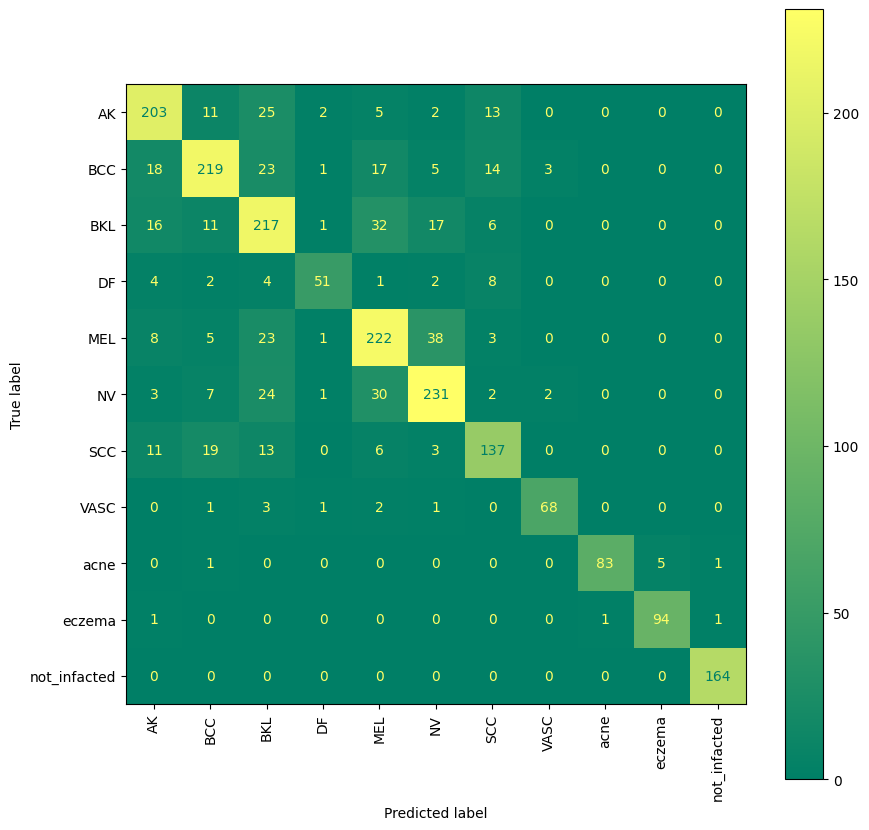

              precision    recall  f1-score   support

          AK       0.77      0.78      0.77       261
         BCC       0.79      0.73      0.76       300
         BKL       0.65      0.72      0.69       300
          DF       0.88      0.71      0.78        72
         MEL       0.70      0.74      0.72       300
          NV       0.77      0.77      0.77       300
         SCC       0.75      0.72      0.74       189
        VASC       0.93      0.89      0.91        76
        acne       0.99      0.92      0.95        90
      eczema       0.95      0.97      0.96        97
not_infacted       0.99      1.00      0.99       164

    accuracy                           0.79      2149
   macro avg       0.83      0.81      0.82      2149
weighted avg       0.79      0.79      0.79      2149

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC', 'acne', 'eczema', 'not_infacted']
DenseNet121(300, 300, 3)lr(0.0005).h5
Found 2149 images belonging to 11 classes.
2149/2149 [======

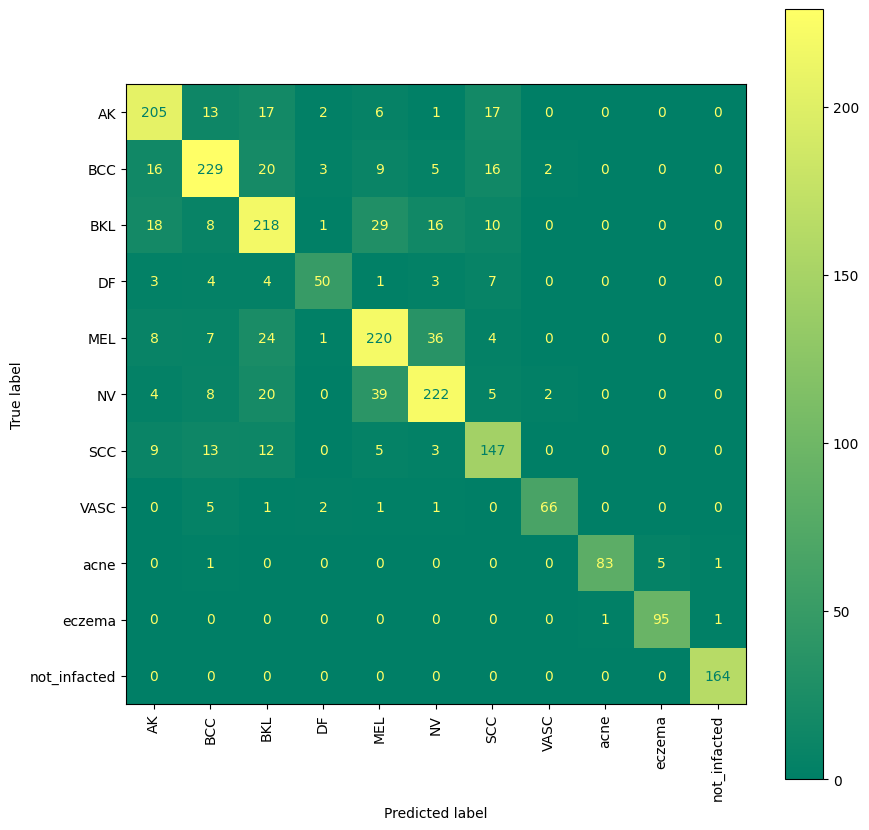

              precision    recall  f1-score   support

          AK       0.78      0.79      0.78       261
         BCC       0.80      0.76      0.78       300
         BKL       0.69      0.73      0.71       300
          DF       0.85      0.69      0.76        72
         MEL       0.71      0.73      0.72       300
          NV       0.77      0.74      0.76       300
         SCC       0.71      0.78      0.74       189
        VASC       0.94      0.87      0.90        76
        acne       0.99      0.92      0.95        90
      eczema       0.95      0.98      0.96        97
not_infacted       0.99      1.00      0.99       164

    accuracy                           0.79      2149
   macro avg       0.83      0.82      0.82      2149
weighted avg       0.79      0.79      0.79      2149

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC', 'acne', 'eczema', 'not_infacted']
DenseNet121(300, 300, 3)lr(0.001).h5
Found 2149 images belonging to 11 classes.
2149/2149 [=======

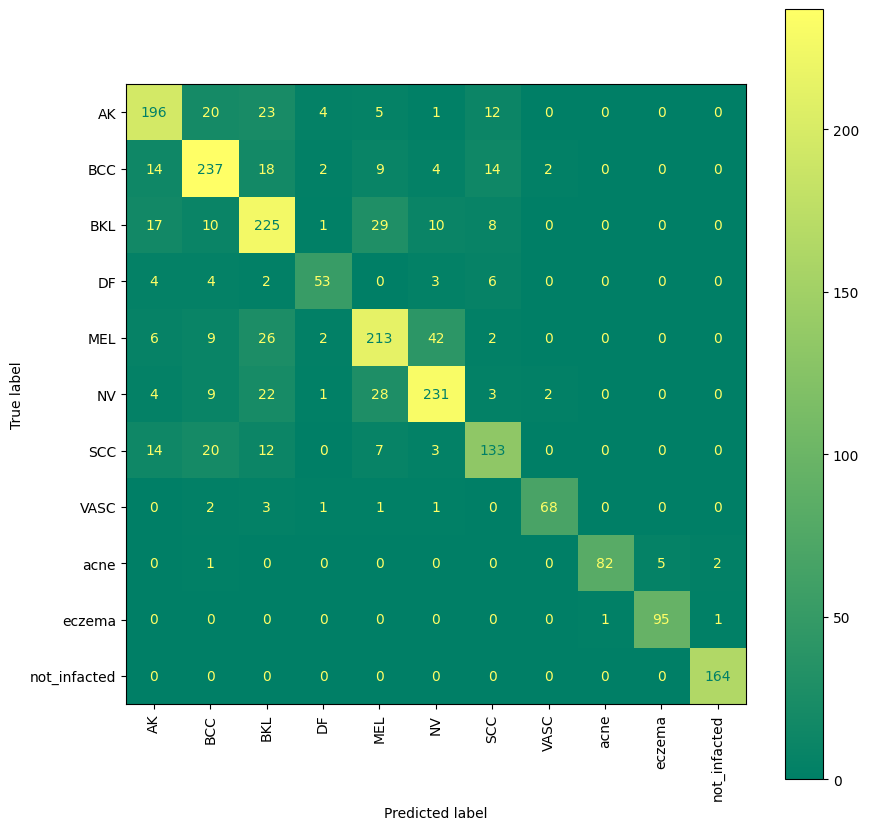

              precision    recall  f1-score   support

          AK       0.77      0.75      0.76       261
         BCC       0.76      0.79      0.77       300
         BKL       0.68      0.75      0.71       300
          DF       0.83      0.74      0.78        72
         MEL       0.73      0.71      0.72       300
          NV       0.78      0.77      0.78       300
         SCC       0.75      0.70      0.72       189
        VASC       0.94      0.89      0.92        76
        acne       0.99      0.91      0.95        90
      eczema       0.95      0.98      0.96        97
not_infacted       0.98      1.00      0.99       164

    accuracy                           0.79      2149
   macro avg       0.83      0.82      0.82      2149
weighted avg       0.79      0.79      0.79      2149

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC', 'acne', 'eczema', 'not_infacted']


In [6]:
#find all .h5 file in folder model and test them

import os
for file in os.listdir('model'):
    if file.endswith('.h5'):
        print(file)
        test_model('model/'+file, 'Sample/val')
